In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import rtbm.layers as layers
import rtbm.model as mdl

import warnings
warnings.filterwarnings('ignore')

from rtbm.costfunctions import mse
from rtbm import minimizer

from rtbm.mathtools import theta_1d
from riemann_theta.riemann_theta import RiemannTheta

import rtbm.layers as layers
import rtbm.model as mdl

# Derivatives test

In [3]:
Q=np.zeros((1,1), dtype=complex)
V=np.zeros((1,1), dtype=complex)
V[0,0]=0.1*2j*np.pi
Q[0,0]=0.01*2*np.pi

print(theta_1d(V,Q,3))

print(RiemannTheta(V/(2j*np.pi),1j*Q/(2*np.pi), derivs=[1,1]))

print(RiemannTheta(V/(2j*np.pi),1j*Q/(2*np.pi), derivs=[[1],[1]]))

(-6.74541145975e-15-225.80792158j)
(1434.49605524+5.69872548808e-14j)
(1434.49605524+5.69872548808e-14j)


# Linear layer test

In [4]:
def funcA(x):
    return 0.6-0.3*x

def funcB(x):
    return -0.5+0.8*x


def func(x1,x2):
    return 0.6-0.3*x1+1.2*x2

X1 = np.linspace(-5.3, 5, 1000)
X2 = np.linspace(-5.5, 5, 1000)

X = np.stack((X1,X2))

#Y = func(X1,X2).reshape((1,X.shape[1]))
Y = np.stack((funcA(X1),funcB(X2)))

M = mdl.Model()
M.add(layers.Linear(2,2))

#minim = minimizer.CMA(True)
#minim.train(mse(), M, X, Y, tolfun=1e-3)

M = mdl.Model()
M.add(layers.Linear(2,1))
M.add(layers.Linear(1,2))


minim = minimizer.SGD()
minim.train(mse(), M, X, Y, lr=0.0001,maxiter=1000)

(0, ' cost: ', 3.4083420457155307)
(100, ' cost: ', 2.9234231075471531)
(200, ' cost: ', 2.6047814991511209)
(300, ' cost: ', 2.3828997826144258)
(400, ' cost: ', 2.2203929309162187)
(500, ' cost: ', 2.0954538096597366)
(600, ' cost: ', 1.9946051388020656)
(700, ' cost: ', 1.9091854211118628)
(800, ' cost: ', 1.8334935954242932)
(900, ' cost: ', 1.7637362106834285)
('Cost: ', 1.6980459810035595)
('Sol: ', array([0.78428081, -0.41544795, 0.82762204, -0.06217791, 0.37996248,
       0.40987476, 0.75528045]))


array([0.78428081, -0.41544795, 0.82762204, -0.06217791, 0.37996248,
       0.40987476, 0.75528045])

# E(h|v) SGD test

(0, ' cost: ', (26.381482767514914+0j))
(100, ' cost: ', (0.71382337324269018+0j))
(200, ' cost: ', (0.26161171949398693+0j))
(300, ' cost: ', (0.25497786393370614+0j))
(400, ' cost: ', (0.25484530594426152+0j))
(500, ' cost: ', (0.25474275386931367+0j))
(600, ' cost: ', (0.25466152460017749+0j))
(700, ' cost: ', (0.25459634215496307+0j))
(800, ' cost: ', (0.25454322760504683+0j))
(900, ' cost: ', (0.25449918266903121+0j))
('Cost: ', (0.25446229453150115+0j))
('Sol: ', array([ 0.09022789+0.j, -8.17544322+0.j,  8.76681672+0.j]))


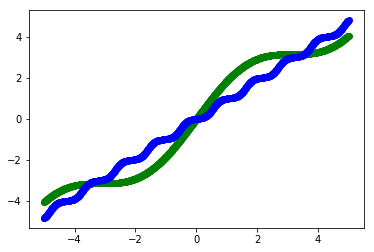

In [7]:
def func(x):
    return np.sin(x)+x

X = np.linspace(-5, 5, 1000)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None]).reshape((1,X.shape[1]))

M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(1,1))

minim = minimizer.SGD()
minim.train(mse(), M, X, Y, lr=0.1,maxiter=1000)

plt.plot(X.flatten(), Y.flatten(),"og-", label='fit')
plt.plot(X.flatten(), np.real(M.predict(X)).flatten(),"ob-", label='fit')

In [ ]:
def func(x1,x2):
    return 0.2*x1+0.4*x2+0.8

X1 = np.linspace(-5.3, 5, 1000)
X2 = np.linspace(-5.5, 5, 1000)

X = np.stack((X1,X2))

Y = func(X1[:,None],X2[:,None]).reshape((1,X1.shape[0]))

M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(2,1))
M.add(layers.DiagExpectationUnitLayer(1,1))


minim = minimizer.SGD()
minim.train(mse(), M, X, Y, lr=0.1,maxiter=400)

#plt.plot(X.flatten(), Y.flatten(),"og-", label='fit')
#plt.plot(X.flatten(), np.real(M.predict(X)).flatten(),"ob-", label='fit')

# Layer test

In [ ]:
M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(1,3))
M.add(layers.DiagExpectationUnitLayer(3,1))

In [ ]:
def func(x):
    return np.sin(x)

X = np.linspace(0, 10, 5)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None]).reshape((1,X.shape[1]))

In [ ]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [ ]:
minim = minimizer.CMA(True)
minim.train(mse(), M, X, Y, tolfun=1e-3)

In [ ]:
npoints = 5
test_X = (np.linspace(0, 10, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.legend()

# Misc tests

In [ ]:
L = layers.MaxPosLayer(3,1)

In [ ]:
L.feedin(np.array([Y,2*Y,1*Y]).reshape(3,5))

In [ ]:
np.array([Y,2*Y,Y]).reshape(3,5)

In [ ]:
np.empty(0)

In [ ]:
derivative_1d_theta_phaseI([0.1],[1j],0)